In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
# Data from https://www.knmi.nl/nederland-nu/klimatologie/daggegevens
df = pd.read_csv("data/etmgeg_240.txt", skiprows=47, low_memory=False)
df = df.rename(columns=lambda x: x.strip())
relevant_columns = [
    'YYYYMMDD',
    'FG',  # Daily mean wind speed (in 0.1 m / s)
    'TG',  # Daily mean temperature in (0.1 degrees Celsius)
    'TN',  # Minimum temperature (in 0.1 degrees Celsius)
    'TX',  # Maximum temperature (in 0.1 degrees Celsius)
    'SQ',  # Sunshine duration (in 0.1 hour)
    'RH',  # Daily precipitation amount (in 0.1 mm)
    'NG',  # Mean daily cloud cover (in octants, 9=sky invisible)
]
df = df[relevant_columns]
df = df.rename(
    columns={
        'FG': 'MeanWindSpeed',
        'TG': 'MeanTemperature',
        'TN': 'MinTemperature',
        'TX': 'MaxTemperature',
        'SQ': 'SunshineDuration',
        'RH': 'PrecipitationAmount',
        'NG': 'MeanCloudCover',
    })
df['MeanCloudCover'] = pd.to_numeric(df['MeanCloudCover'], errors='coerce')
df['SunshineDuration'] = pd.to_numeric(df['SunshineDuration'], errors='coerce')
df['PrecipitationAmount'] = pd.to_numeric(df['PrecipitationAmount'], errors='coerce')
df = df.fillna(0)
df['YYYYMMDD2'] = pd.to_datetime(df['YYYYMMDD'], format="%Y%m%d")
df['YYYY'] = df['YYYYMMDD2'].map(lambda x: x.year)
df['MM'] = df['YYYYMMDD2'].map(lambda x: x.month)
df['DD'] = df['YYYYMMDD2'].map(lambda x: x.day)
df = df.set_index('YYYYMMDD')
df.to_csv("data/etmgeg_240.csv")
df.head()

,MeanWindSpeed,MeanTemperature,MinTemperature,MaxTemperature,SunshineDuration,PrecipitationAmount,MeanCloudCover,YYYYMMDD2,YYYY,MM,DD
YYYYMMDD,,,,,,,,,,,
19510101,87,12,-13,26,0.0,0.0,7.0,1951-01-01,1951,1,1
19510102,41,13,7,18,0.0,0.0,8.0,1951-01-02,1951,1,2
19510103,21,3,-20,16,0.0,0.0,6.0,1951-01-03,1951,1,3
19510104,77,12,-7,19,0.0,0.0,7.0,1951-01-04,1951,1,4
19510105,87,48,18,84,0.0,0.0,8.0,1951-01-05,1951,1,5


/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


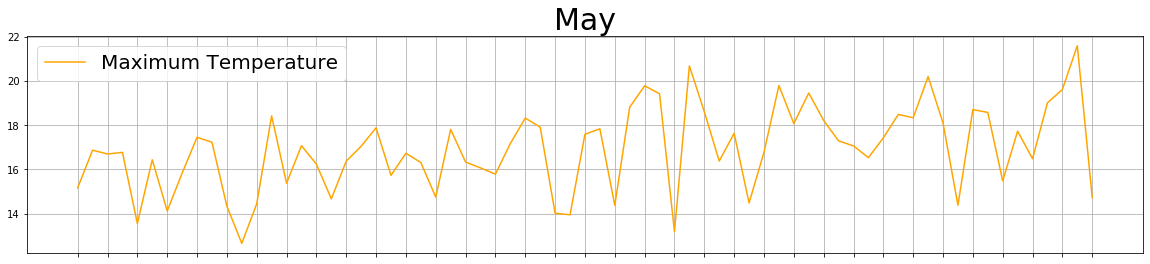

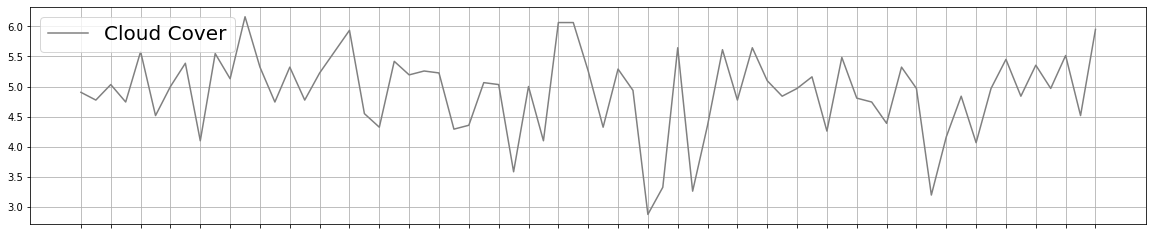

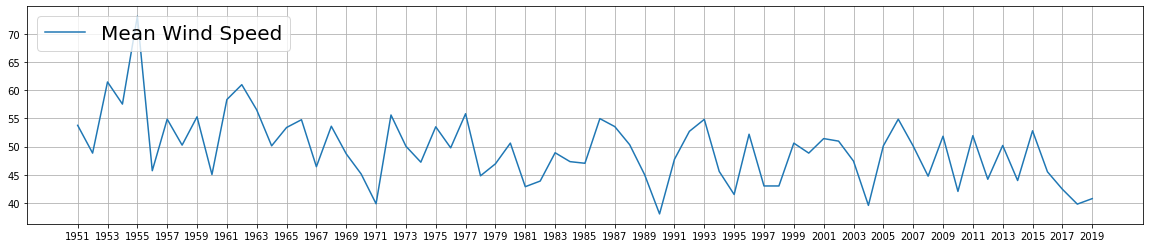

In [3]:
def plot_month(month, month_name):
    may = df[df['MM'] == month]
    may_avgs = may.groupby(['YYYY']).mean().reset_index()

    plt.figure(figsize=(20,4))
    plt.plot(may_avgs['YYYY'], may_avgs['MaxTemperature'] / 10.0, color='orange', label='Maximum Temperature')
    plt.legend(fontsize=20, loc="upper left")#, fontproperties = prop)
    plt.title(month_name, fontsize=30)
    plt.xticks(np.arange(1951, 2020, 2))
    plt.axes().set_xticklabels([])
    plt.grid()

    plt.figure(figsize=(20,4))
    plt.plot(may_avgs['YYYY'], may_avgs['MeanCloudCover'], color='grey', label='Cloud Cover')
    plt.legend(fontsize=20, loc="upper left")#, fontproperties = prop)
    plt.xticks(np.arange(1951, 2020, 2))
    plt.axes().set_xticklabels([])
    plt.grid()

    plt.figure(figsize=(20,4))
    plt.plot(may_avgs['YYYY'], may_avgs['MeanWindSpeed'], label='Mean Wind Speed')
    plt.legend(fontsize=20, loc="upper left")#, fontproperties = prop)
    plt.xticks(np.arange(1951, 2020, 2))
    plt.grid()

    plt.show()

plot_month(5, 'May')

/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


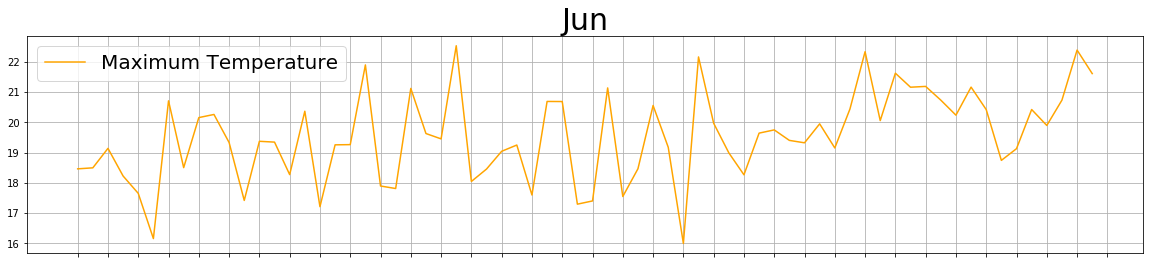

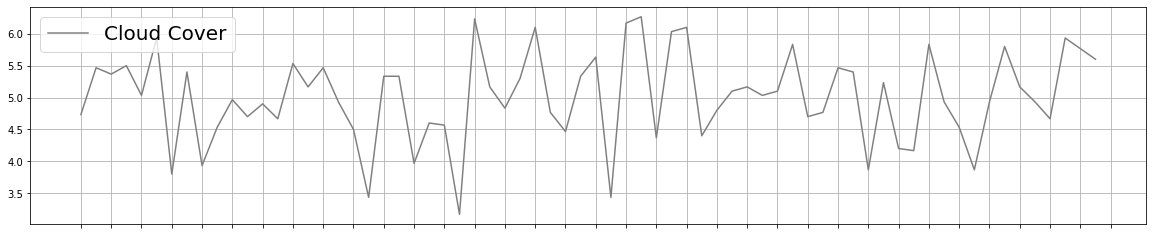

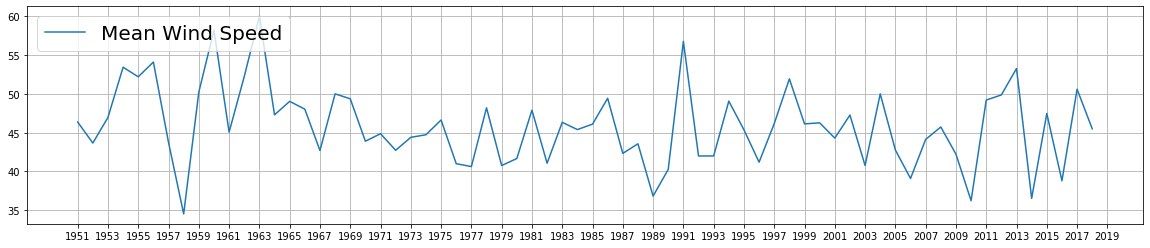

In [4]:
plot_month(6, 'Jun')

In [5]:
from datetime import date, timedelta

df_prepared = pd.DataFrame()
cols = [
    'MeanWindSpeed', 'MeanTemperature', 'MinTemperature', 'MaxTemperature',
    'SunshineDuration', 'PrecipitationAmount', 'MeanCloudCover'
]
for year in range(1963, 2019 + 1):
    for month in range(1, 12 + 1):
        if year == 2019 and month == 7:
            break
        row = pd.DataFrame()
        dt = date(year, month, 1)
        dt_pasts = [ int((dt - timedelta(days=day)).strftime("%Y%m%d")) for day in range(30, 365 + 1) ]
        prev_rows = df.loc[dt_pasts].reset_index()
        prev_rows['d-minus'] = [ str(i + 1) + 'd_ago' for i in range(len(prev_rows)) ]
        prev_rows = prev_rows.set_index('d-minus')
        for col in cols:
            prev_rows_col = prev_rows[[col]].T
            prev_rows_col = prev_rows_col.rename(lambda x: col + '_' + x, axis='columns')
            prev_rows_col = prev_rows_col.reset_index().drop(['index'], axis='columns')
            row = pd.concat([row, prev_rows_col], axis=1, sort=False)
        row['YYYYMM'] = int(date(year, month, 1).strftime("%Y%m"))
        for year_minus in range(9, -1, -1):
            means = df[(df['MM'] == month) & (df['YYYY'] == year - year_minus)].mean()
            for col in cols:
                if year_minus == 0:
                    row[col + '_target'] = means[col]
                else:
                    row[col + '_' + str(year_minus) + 'y_ago'] = means[col]
        df_prepared = pd.concat([df_prepared, row])

df_prepared = df_prepared.reset_index(drop=True)
del df_prepared.columns.name
df_prepared.head()

,MeanWindSpeed_1d_ago,MeanWindSpeed_2d_ago,MeanWindSpeed_3d_ago,MeanWindSpeed_4d_ago,MeanWindSpeed_5d_ago,MeanWindSpeed_6d_ago,MeanWindSpeed_7d_ago,MeanWindSpeed_8d_ago,MeanWindSpeed_9d_ago,MeanWindSpeed_10d_ago,...,SunshineDuration_1y_ago,PrecipitationAmount_1y_ago,MeanCloudCover_1y_ago,MeanWindSpeed_target,MeanTemperature_target,MinTemperature_target,MaxTemperature_target,SunshineDuration_target,PrecipitationAmount_target,MeanCloudCover_target
0,36,26,31,36,5,0,0,21,62,31,...,0.0,0.0,5.548387,58.806452,-49.935484,-78.258065,-24.129032,30.741935,0.0,4.774194
1,87,93,87,87,46,21,36,31,57,93,...,0.0,0.0,5.535714,37.750000,-34.642857,-69.178571,-6.857143,28.857143,0.0,5.250000
2,41,21,46,36,87,41,41,26,21,77,...,0.0,0.0,5.419355,57.967742,45.935484,15.354839,82.290323,31.258065,0.0,5.677419
3,31,36,36,46,41,26,21,5,10,10,...,0.0,0.0,5.966667,54.366667,90.400000,52.400000,126.566667,53.966667,0.0,5.233333
4,31,72,31,57,46,36,41,123,72,46,...,0.0,0.0,6.161290,56.516129,108.709677,68.451613,144.419355,53.838710,0.0,5.322581


In [6]:
from sklearn.preprocessing import StandardScaler

def drop_targets(df):
    return df.drop(columns=[x + "_target" for x in cols]).drop(['YYYYMM'], axis='columns')

scaler = StandardScaler()
features_to_scale = drop_targets(df_prepared.copy())
columns = features_to_scale.columns
df_scaled = df_prepared.copy()
df_scaled[columns] = scaler.fit_transform(features_to_scale)

train = df_scaled[df_scaled['YYYYMM'] < 201301]
test = df_scaled[(df_scaled['YYYYMM'] >= 201301) & (df_scaled['YYYYMM'] < 201905)]

X_train = drop_targets(train)
y_train = train["MaxTemperature_target"]
X_test = drop_targets(test)
y_test = test["MaxTemperature_target"]

X_train.head()

/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,MeanWindSpeed_1d_ago,MeanWindSpeed_2d_ago,MeanWindSpeed_3d_ago,MeanWindSpeed_4d_ago,MeanWindSpeed_5d_ago,MeanWindSpeed_6d_ago,MeanWindSpeed_7d_ago,MeanWindSpeed_8d_ago,MeanWindSpeed_9d_ago,MeanWindSpeed_10d_ago,...,SunshineDuration_2y_ago,PrecipitationAmount_2y_ago,MeanCloudCover_2y_ago,MeanWindSpeed_1y_ago,MeanTemperature_1y_ago,MinTemperature_1y_ago,MaxTemperature_1y_ago,SunshineDuration_1y_ago,PrecipitationAmount_1y_ago,MeanCloudCover_1y_ago
0,-0.612428,-1.071562,-0.809483,-0.593017,-1.935487,-2.088666,-2.165671,-1.297700,0.479594,-0.831334,...,-1.77884,-1.240718,0.085891,2.454619,-1.144969,-1.023796,-1.225844,-1.851196,-1.274679,0.261085
1,1.507345,1.770546,1.502768,1.574109,-0.215123,-1.217772,-0.578674,-0.868823,0.254036,1.783794,...,-1.77884,-1.240718,0.534442,3.299803,-1.225931,-1.102413,-1.308453,-1.851196,-1.274679,0.245691
2,-0.404607,-1.283660,-0.190130,-0.593017,1.505241,-0.388349,-0.358258,-1.083262,-1.369983,1.108922,...,-1.77884,-1.240718,-0.193208,-0.552415,-1.445385,-1.549053,-1.378524,-1.851196,-1.274679,0.104342
3,-0.820249,-0.647367,-0.603032,-0.168091,-0.424923,-1.010416,-1.239923,-1.983903,-1.866211,-1.717103,...,-1.77884,-1.240718,0.719844,1.691747,-0.408765,-0.385334,-0.418335,-1.851196,-1.274679,0.769195
4,-0.820249,0.879736,-0.809483,0.299329,-0.215123,-0.595704,-0.358258,3.076843,0.930710,-0.198642,...,-1.77884,-1.240718,-0.233079,0.992777,-0.035607,0.112925,-0.136309,-1.851196,-1.274679,1.005617


Train score: 1.0
Test score: 0.8483640201989882


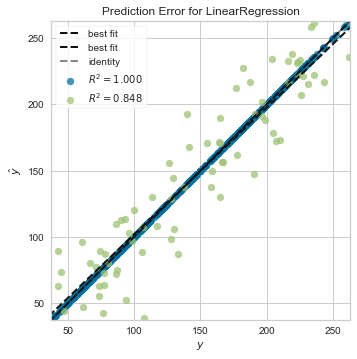

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from yellowbrick.regressor import PredictionError

model = PredictionError(LinearRegression())
model.fit(X_train, y_train)

print("Train score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))
model.poof()

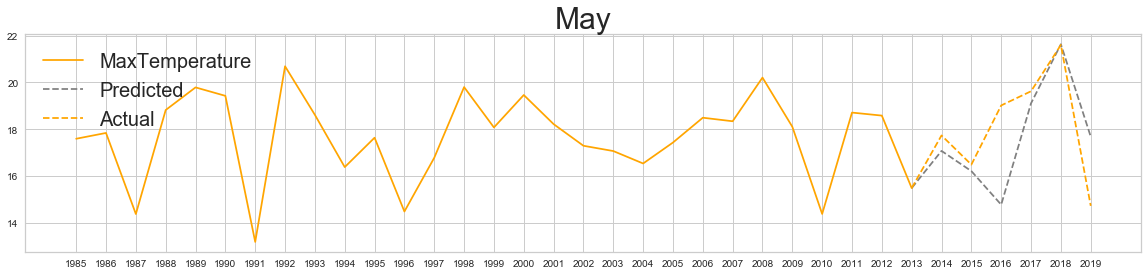

In [8]:
def plot_prediction(model, month, month_name, target, color, div=1):
    month_df = df[(df['MM'] == int(month)) & (df['YYYY'] >= 1985)]
    month_avgs = month_df.groupby(['YYYY']).mean().reset_index()
    month_avgs[target] /= div

    X_predict = drop_targets(df_scaled[
        (df_scaled['YYYYMM'] == int("2019" + month)) |
        (df_scaled['YYYYMM'] == int("2018" + month)) |
        (df_scaled['YYYYMM'] == int("2017" + month)) |
        (df_scaled['YYYYMM'] == int("2016" + month)) |
        (df_scaled['YYYYMM'] == int("2014" + month)) |
        (df_scaled['YYYYMM'] == int("2013" + month))
    ])
    predictions = model.predict(X_predict) / div
    last_value = month_avgs[month_avgs['YYYY'] == 2013][target].values[0]
    predictions = np.insert(predictions, 0, last_value, axis=0)

    plt.figure(figsize=(20,4))
    
    historical = month_avgs[month_avgs['YYYY'] <= 2013]
    plt.plot(historical['YYYY'], historical[target], color=color, label=target)
    plt.plot(range(2013, 2020), predictions, color='grey', linestyle='dashed', label='Predicted')
    real = month_avgs[month_avgs['YYYY'] >= 2013]
    plt.plot(real['YYYY'], real[target], color=color, linestyle='dashed', label='Actual')
    
    plt.legend(fontsize=20, loc="upper left")
    plt.title(month_name, fontsize=30)
    plt.xticks(np.arange(1985, 2020, 1))
    plt.grid(True)
    plt.show()

plot_prediction(model, "05", "May", "MaxTemperature", "orange", 10)

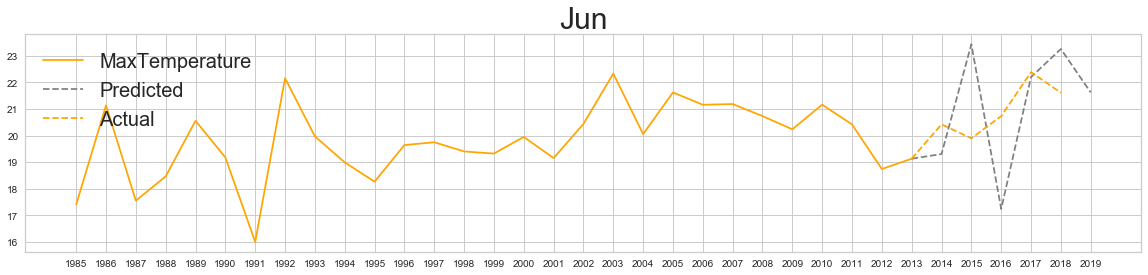

In [9]:
plot_prediction(model, "06", "Jun", "MaxTemperature", "orange", 10)

Train score: 1.0
Test score: 0.8483640201989882


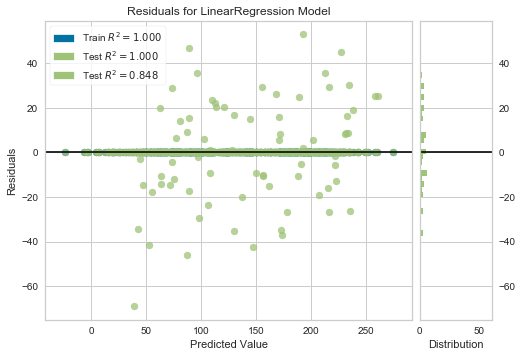

In [10]:
from yellowbrick.regressor import ResidualsPlot

model = ResidualsPlot(LinearRegression())
model.fit(X_train, y_train)

print("Train score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))
model.poof()

/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Train score: 0.9636013321787342
Test score: 0.9014072146961967


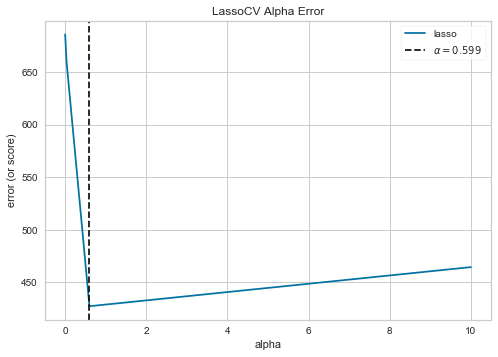

In [11]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 10)

model = AlphaSelection(LassoCV(alphas=alphas, cv=3))
model.fit(X_train, y_train)

print("Train score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))
model.poof()

<Figure size 576x396 with 0 Axes>

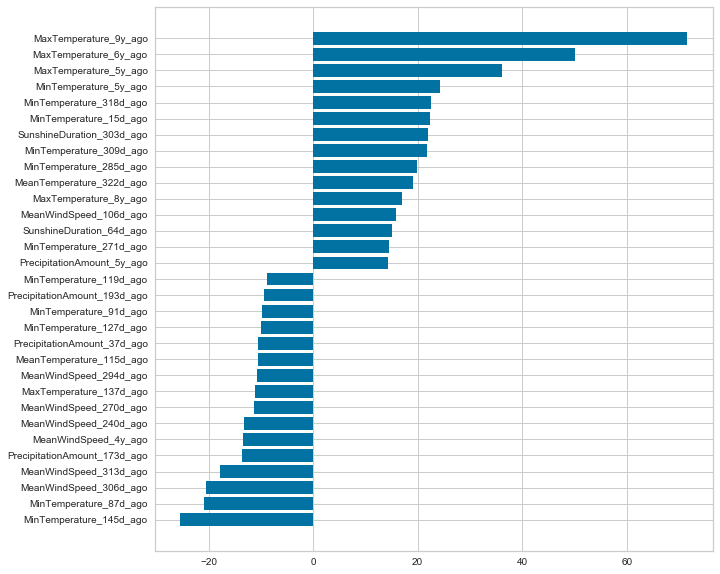

In [12]:
from yellowbrick.features.importances import FeatureImportances
from sklearn.linear_model import Lasso

fig, ax = plt.subplots()
feature_importances_model = FeatureImportances(Lasso(alpha=0.6), ax = ax)
feature_importances_model.fit(X_train, y_train)
plt.gcf().clear()

plt.figure(figsize=(10,10))

less_important_labels, less_important = (list(feature_importances_model.features_[0:16]), list(feature_importances_model.feature_importances_[0:16]))
more_important_labels, more_important = (list(feature_importances_model.features_[-16:-1]), list(feature_importances_model.feature_importances_[-16:-1]))

plt.barh(less_important_labels + more_important_labels, less_important + more_important)
plt.show()

/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Train score: 0.9567175773944616
Test score: -0.19736540289477


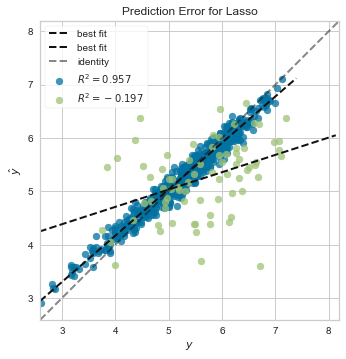

In [13]:
from sklearn.linear_model import Lasso

y_train = train["MeanCloudCover_target"]
y_test = test["MeanCloudCover_target"]

alphas = np.logspace(-3, 1, 50)
# model_cloud = AlphaSelection(LassoCV(alphas=alphas, cv=3))
model_cloud = PredictionError(Lasso(alpha=0.005))
model_cloud.fit(X_train, y_train)

print("Train score:", model_cloud.score(X_train, y_train))
print("Test score:", model_cloud.score(X_test, y_test))
model_cloud.poof()

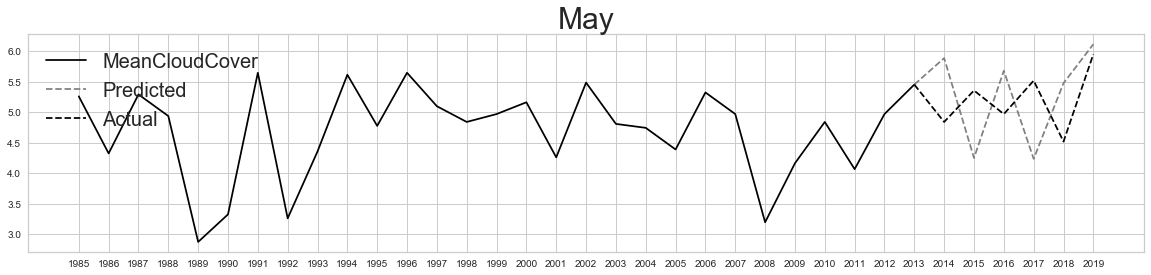

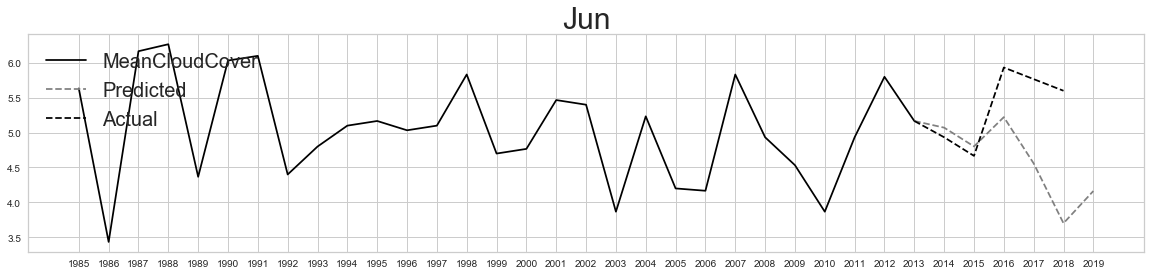

In [14]:
plot_prediction(model_cloud, "05", "May", "MeanCloudCover", "black")
plot_prediction(model_cloud, "06", "Jun", "MeanCloudCover", "black")

/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score: 0.860932294536666
Test score: 0.29625964391425796


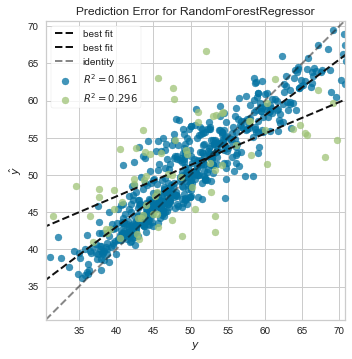

In [15]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge, LassoLars, Lars, ElasticNet, SGDRegressor, PassiveAggressiveRegressor, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor

y_train = train["MeanWindSpeed_target"]
y_test = test["MeanWindSpeed_target"]

alphas = np.logspace(-20, 1, 50)
# model_wind = AlphaSelection(LassoCV(alphas=alphas, cv=3))
# model_wind = PredictionError(Lasso(alpha=0.001))
model_wind = PredictionError(RandomForestRegressor())
# model_wind = PredictionError(MLPRegressor(max_iter=200, alpha=0.5, activation='adam', hidden_layer_sizes=(750, 2250)))
model_wind.fit(X_train, y_train)

print("Train score:", model_wind.score(X_train, y_train))
print("Test score:", model_wind.score(X_test, y_test))
model_wind.poof()

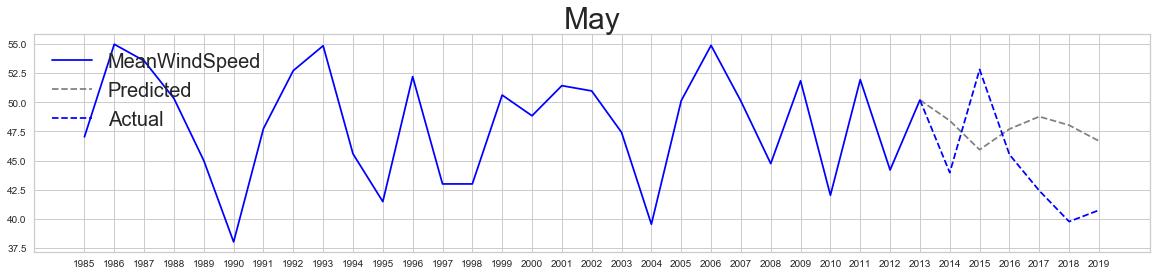

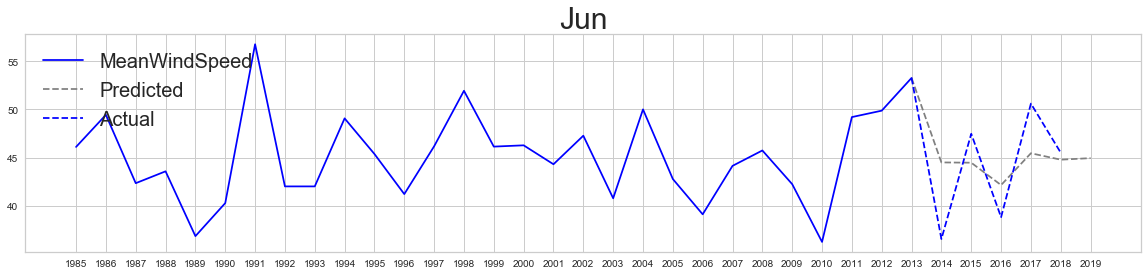

In [16]:
plot_prediction(model_wind, "05", "May", "MeanWindSpeed", "blue")
plot_prediction(model_wind, "06", "Jun", "MeanWindSpeed", "blue")

/Users/rchaves/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Train score: 0.9998059619320848
Test score: -0.9082781960962218


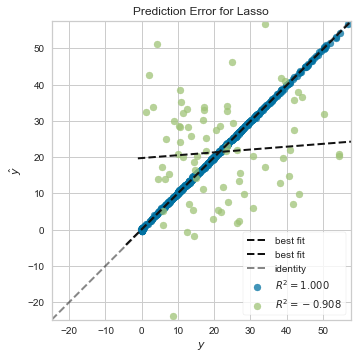

,MeanWindSpeed_9y_ago,MeanTemperature_9y_ago,MinTemperature_9y_ago,MaxTemperature_9y_ago,SunshineDuration_9y_ago,PrecipitationAmount_9y_ago,MeanCloudCover_9y_ago,MeanWindSpeed_8y_ago,MeanTemperature_8y_ago,MinTemperature_8y_ago,...,SunshineDuration_2y_ago,PrecipitationAmount_2y_ago,MeanCloudCover_2y_ago,MeanWindSpeed_1y_ago,MeanTemperature_1y_ago,MinTemperature_1y_ago,MaxTemperature_1y_ago,SunshineDuration_1y_ago,PrecipitationAmount_1y_ago,MeanCloudCover_1y_ago
0,2.673952,-1.655459,-1.616090,-1.627350,-1.379879,-1.035482,-1.268328,0.978604,-1.699144,-1.598050,...,-1.77884,-1.240718,0.085891,2.454619,-1.144969,-1.023796,-1.225844,-1.851196,-1.274679,0.261085
1,0.693629,-1.856541,-1.845318,-1.817992,-1.379879,-1.035482,0.544170,1.894499,-1.721437,-1.714500,...,-1.77884,-1.240718,0.534442,3.299803,-1.225931,-1.102413,-1.308453,-1.851196,-1.274679,0.245691
2,0.998838,-0.795765,-0.739852,-0.810728,-1.379879,-1.035482,1.335261,1.478857,-1.446535,-1.602711,...,-1.77884,-1.240718,-0.193208,-0.552415,-1.445385,-1.549053,-1.378524,-1.851196,-1.274679,0.104342
3,1.025467,-0.621536,-0.911276,-0.492338,-1.379879,-1.035482,-1.628825,0.509290,-0.333708,-0.481599,...,-1.77884,-1.240718,0.719844,1.691747,-0.408765,-0.385334,-0.418335,-1.851196,-1.274679,0.769195
4,0.540582,0.527248,0.451805,0.572168,-1.379879,-1.035482,-0.707555,2.101814,0.022230,0.044567,...,-1.77884,-1.240718,-0.233079,0.992777,-0.035607,0.112925,-0.136309,-1.851196,-1.274679,1.005617


In [44]:
from sklearn.linear_model import Lasso

y_train = train["PrecipitationAmount_target"]
y_test = test["PrecipitationAmount_target"]

alphas = np.logspace(-3, 1, 50)
model_precipitation = PredictionError(Lasso(alpha=0.005))
model_precipitation.fit(X_train, y_train)

print("Train score:", model_precipitation.score(X_train, y_train))
print("Test score:", model_precipitation.score(X_test, y_test))
model_precipitation.poof()
X_train_.head()

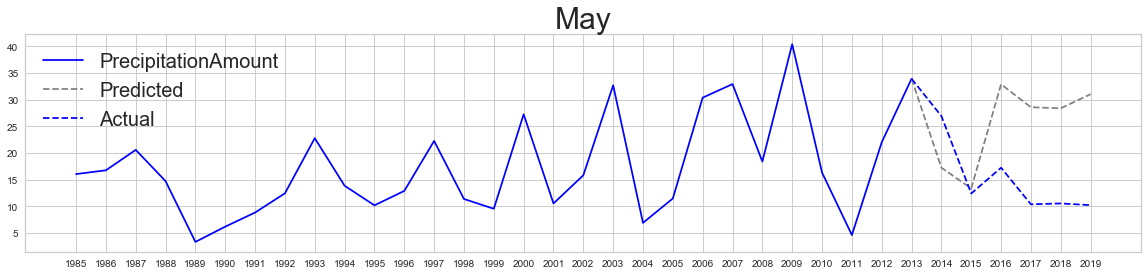

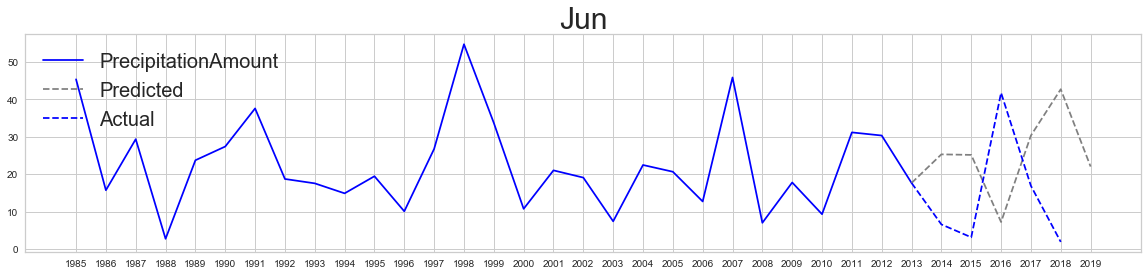

In [45]:
plot_prediction(model_precipitation, "05", "May", "PrecipitationAmount", "blue")
plot_prediction(model_precipitation, "06", "Jun", "PrecipitationAmount", "blue")